In [1]:
sample_url = 'https://preview.redd.it/hhzg3z2ky0s31.gif?format=png8&s=2465ba84c3bbac73d0588a225d819579aaaba4a7'

In [3]:
import urllib.request
save_dir = 'C:/Users/Benjamin/Desktop/File 1/001.jpg'

urllib.request.urlretrieve(sample_url, save_dir)

('C:/Users/Benjamin/Desktop/File 1/001.jpg',
 <http.client.HTTPMessage at 0x186b75d1048>)

### Download Multiple Files with Label as Filename 

In [4]:
import urllib.request

def bulk_download_image(url_list, label_list, directory=''):
    success = 0
    fail = 0
    for i in range(len(url_list)):
        try:
            urllib.request.urlretrieve(url_list[i], directory + label_list[i] +'.jpg')
            success +=1
        except:
            fail +=1
    print(success, " images successfully downloaded")
    print(fail, " images failed to download")

In [5]:
sample_url_list = ["https://i.pinimg.com/originals/a4/90/47/a49047d73e5644961b123aa48790d5c8.jpg",
                  "https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/cc_iStock-478639870_16x9.jpg?itok=1-jMc4Xv",
                  "https://lithub.com/wp-content/uploads/2019/09/octopus-1.jpg",
                  "asdfasdfhawefa.afhaweofhawefa"]
sample_label_list = ['jack', 'tree', 'octopus', 'corrupted url']

save_dir = 'C:/Users/Benjamin/Desktop/File 1/'
#bulk_download_image(sample_url_list, sample_label_list)
bulk_download_image(sample_url_list, sample_label_list, save_dir)

3  images successfully downloaded
1  images failed to download


### Example with Dataframe

In [6]:
import pandas as pd

df = pd.read_csv('C:/Users/Benjamin/Downloads/image-classification-people-food-DFE.csv')
df.head()

,_unit_id,_unit_state,_trusted_judgments,_last_judgment_at,if__people_are_eating_the_cake_please_choose_their_gender_,if__people_are_eating_the_cake_please_choose_their_gender_:confidence,if_people_are_eating_the_cake_please_choose_their_age_,if_people_are_eating_the_cake_please_choose_their_age_:confidence,who_is_eating_or_is_likely_to_eat_the_cake,who_is_eating_or_is_likely_to_eat_the_cake:confidence,image_url
0,685655207,finalized,3,3/6/15 13:33,Female,1.0,Adult/Teenager (13 or older),1.0,Person,1.0000,http://media1.onsugar.com/files/2012/02/07/2/1...
1,685655208,finalized,3,3/6/15 13:38,Female,1.0,Adult/Teenager (13 or older),1.0,Person,1.0000,http://www.skirtcollective.com/wp-content/uplo...
2,685655209,finalized,3,3/6/15 13:32,Female,1.0,Adult/Teenager (13 or older),1.0,Person,1.0000,http://www.innovativeinsightsllc.com/wp-conten...
3,685655210,finalized,3,3/6/15 13:34,Female,1.0,Adult/Teenager (13 or older),1.0,Person,1.0000,http://www.moreyspiers.com/memoreys/wp-content...
4,685655211,finalized,3,3/6/15 13:31,Male,1.0,Kid (younger than 13),1.0,Person,0.6846,https://theplaidguy.files.wordpress.com/2012/0...


In [7]:
import urllib.request

#add number to each image if duplicate label values

def bulk_download_image(url_list, label_list, directory=''):
    success = 0
    fail = 0
    for i in range(len(url_list)):
        try:
            urllib.request.urlretrieve(url_list[i], directory + label_list[i] + str(i) +'.jpg')
            success +=1
        except:
            fail +=1
    print(success, " images successfully downloaded")
    print(fail, " images failed to download")

bulk_download_image(df['image_url'][0:50], df['if__people_are_eating_the_cake_please_choose_their_gender_'][0:50], save_dir)

28  images successfully downloaded
22  images failed to download


Note: manually tested some of the failed instances to check the funciton and found there really were a lot of urls which no longer exist

### Import Single Image from File as numpy.ndarray

In [1]:
import os
print(os.getcwd())
os.chdir('C:/Users/Benjamin/Desktop/File 1') #change wd to where files are
print(os.getcwd())

C:\Users\Benjamin
C:\Users\Benjamin\Desktop\File 1


In [109]:
import cv2
import numpy as np
from numpy import asarray

img = cv2.imread('Female0.jpg', 0) #0 flag means grayscale
img = cv2.resize(img, (50, 50))
print(img.shape)
img

(50, 50)


array([[189, 191, 193, ...,  78,  78,  79],
       [190, 192, 194, ...,  79,  78,  78],
       [190, 191, 193, ...,  78,  77,  78],
       ...,
       [232, 232, 219, ...,   4,  15,   4],
       [230, 230, 227, ...,   1,   3,   0],
       [226, 222, 225, ...,   3,   3,   7]], dtype=uint8)

### Import Multiple Images from File as numpy.ndarray
Label will be file name

In [123]:
#don't forget to first change wd
import glob
sample_file_list = glob.glob('*.jpg')
sample_file_list

['Female0.jpg',
 'Female10.jpg',
 'Female13.jpg',
 'Female15.jpg',
 'Female20.jpg',
 'Female21.jpg',
 'Female25.jpg',
 'Female30.jpg',
 'Female31.jpg',
 'Female33.jpg',
 'Female35.jpg',
 'Female36.jpg',
 'Female39.jpg',
 'Female45.jpg',
 'Female46.jpg',
 'Female49.jpg',
 'Male12.jpg',
 'Male16.jpg',
 'Male23.jpg',
 'Male27.jpg',
 'Male37.jpg',
 'Male38.jpg',
 'Male4.jpg',
 'Male42.jpg',
 'Male43.jpg',
 'Male44.jpg',
 'Male47.jpg',
 'Male8.jpg']

In [179]:
def bulk_image_file_to_array(file_list, width=28, height=28):
    ndim_array = np.zeros((0, width, height)) #blank, numpy.ndarray template
    label_list = []
    success = 0
    fail = 0
    for i in file_list:
        try:
            img = cv2.imread(i, 0) #0 flag means grayscale
            img = cv2.resize(img, (width, height))
            reshape = np.reshape(img, (1, width, height)) #reshape each individual image to match the template
            ndim_array = np.append(ndim_array, reshape, axis=0)
            label_list.append(i)
            success  +=1
        except:
            fail +=1
    ndim_array = ndim_array.astype(np.uint8)
    return ndim_array, np.array(label_list)
    print(success, " images successfully downloaded")
    print(fail, " images failed to download")

In [180]:
#bulk_image_file_to_array(sample_file_list)
images, labels = bulk_image_file_to_array(sample_file_list, 100, 100)
print(images.shape)
print(len(labels))
images

(24, 100, 100)
24


array([[[188, 190, 191, ...,  78,  79,  80],
        [189, 190, 191, ...,  79,  80,  80],
        [189, 191, 191, ...,  77,  79,  78],
        ...,
        [227, 229, 229, ...,   4,   6,   0],
        [227, 222, 225, ...,   2,   6,   7],
        [232, 228, 221, ...,   2,   4,   2]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [234, 234, 234, ..., 244, 231, 165],
        [231, 232, 231, ..., 244, 233, 177],
        [229, 228, 225, ..., 247, 242, 237]],

       [[187, 185, 182, ...,   3,   1,   2],
        [188, 186, 184, ...,   4,   6,   2],
        [187, 187, 185, ...,   7,   7,   2],
        ...,
        [175, 170, 168, ...,  36,  28,  17],
        [177, 170, 170, ...,  53,  45,  23],
        [175, 170, 169, ...,  91,  86,  52]],

       ...,

       [[  6,  12,   9, ...,   4,   2,   2],
        [ 10,  10,   9, ...,   4,   2,   3],
        [  6,   7,  11, ...,   5,   2,   4

In [181]:
labels

array(['Female0.jpg', 'Female10.jpg', 'Female13.jpg', 'Female15.jpg',
       'Female20.jpg', 'Female21.jpg', 'Female25.jpg', 'Female30.jpg',
       'Female31.jpg', 'Female33.jpg', 'Female35.jpg', 'Female36.jpg',
       'Female46.jpg', 'Female49.jpg', 'Male12.jpg', 'Male16.jpg',
       'Male23.jpg', 'Male37.jpg', 'Male38.jpg', 'Male4.jpg',
       'Male42.jpg', 'Male43.jpg', 'Male44.jpg', 'Male47.jpg'],
      dtype='<U12')

### Lastly, cleanup labels

In [182]:
import re
for i in range(len(labels)):
    labels[i] = labels[i].replace('.jpg', '')
    labels[i] = re.sub('[0-9]', '', labels[i])
    
labels

array(['Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male'], dtype='<U12')

In [183]:
print(type(labels))
print(labels.shape)
print(set(labels))

<class 'numpy.ndarray'>
(24,)
{'Male', 'Female'}


### Final Verification of inputs and labels

In [184]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size = 0.25)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(18, 100, 100)
(18,)
(6, 100, 100)
(6,)


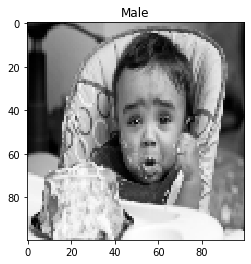

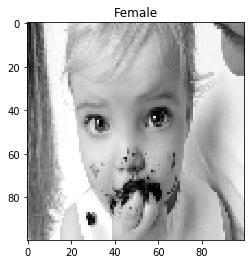

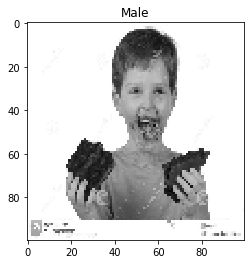

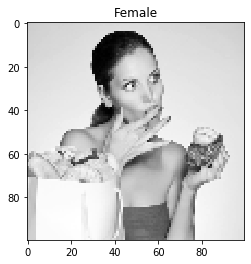

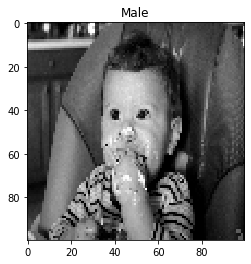

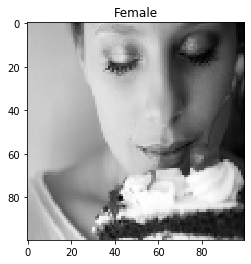

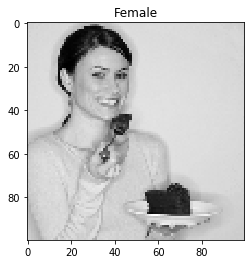

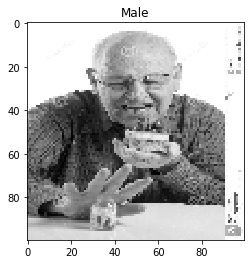

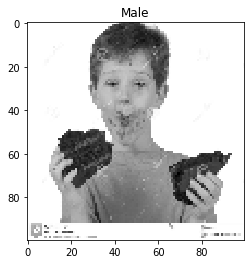

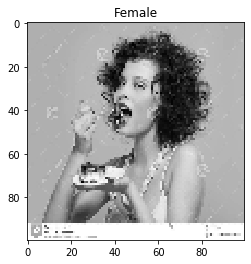

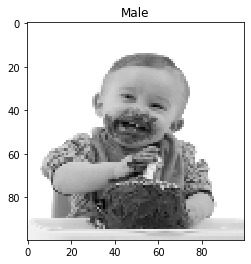

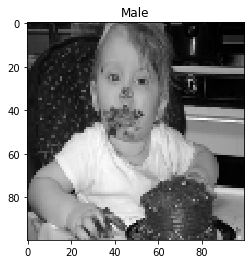

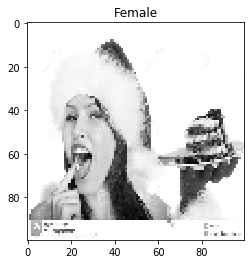

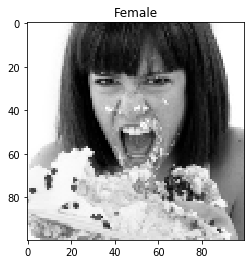

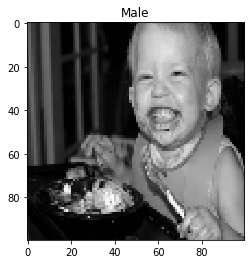

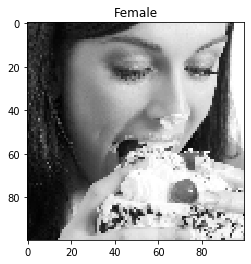

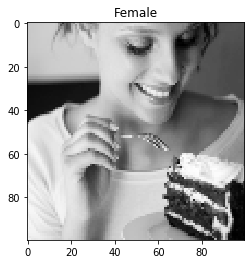

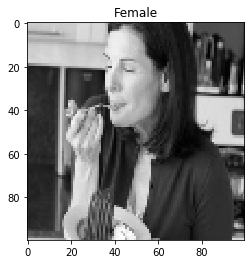

In [185]:
for i in range(len(x_train)):
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title(y_train[i])
    plt.show()

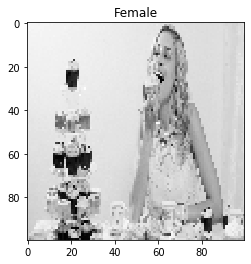

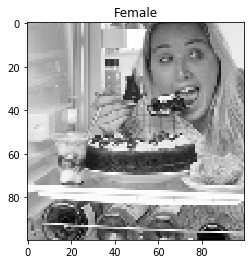

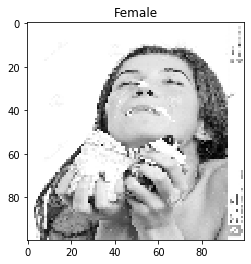

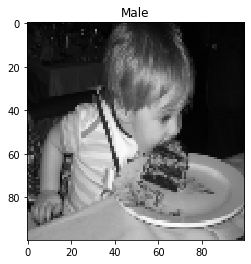

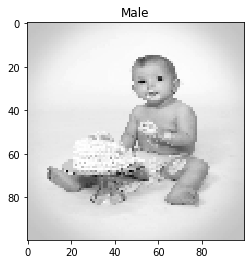

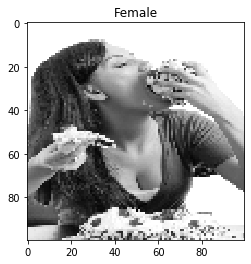

In [186]:
for i in range(len(x_val)):
    plt.imshow(x_val[i], cmap = 'gray')
    plt.title(y_val[i])
    plt.show()